# 6.03 rf 데이터 1~4초 신호 / rf 데이터 7 ~ 10 초 신호 구분하기 실습!
## 데이터를 vectorize 하는 연습!!

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

### 데이터 가져오기

In [2]:
dataSet = pd.read_excel('./rf데이터.xlsx',header=None)

In [3]:
dataSet.columns = ['1m','2m','3m','4m','5m','6m','7m','8m','9m','10m']

In [4]:
print(dataSet.shape)
dataSet.head()

(1012, 10)


,1m,2m,3m,4m,5m,6m,7m,8m,9m,10m
0,-80,-63.0,-78.0,-67.0,-72.0,-85.0,-81.0,-75.0,-83.0,-90.0
1,-72,-64.0,-80.0,-74.0,-67.0,-70.0,-95.0,-76.0,-77.0,-90.0
2,-52,-67.0,-66.0,-74.0,-73.0,-82.0,-81.0,-78.0,-79.0,-80.0
3,-46,-70.0,-70.0,-72.0,-74.0,-81.0,-82.0,-89.0,-76.0,-81.0
4,-68,-65.0,-75.0,-69.0,-71.0,-84.0,-95.0,-88.0,-80.0,-86.0


## rf 데이터 1m ~ 4m / 7m ~ 10m 를 구분하는 특징을 찾자!

In [5]:
dataSet.describe()

,1m,2m,3m,4m,5m,6m,7m,8m,9m,10m
count,1012.000000,975.000000,981.000000,974.000000,954.000000,851.000000,785.000000,954.000000,933.000000,841.000000
mean,-55.468379,-67.771282,-70.691131,-70.096509,-77.382600,-79.792009,-82.374522,-78.279874,-79.431940,-83.887039
std,10.769319,6.075838,4.337239,5.568311,6.997328,9.026509,6.902555,4.769644,5.533058,6.911022
min,-101.000000,-100.000000,-90.000000,-96.000000,-100.000000,-100.000000,-100.000000,-99.000000,-100.000000,-100.000000
25%,-62.000000,-71.000000,-74.000000,-73.000000,-81.000000,-87.000000,-87.000000,-81.000000,-83.000000,-89.000000
50%,-52.000000,-66.000000,-70.000000,-69.000000,-77.000000,-80.000000,-82.000000,-78.000000,-79.000000,-83.000000
75%,-48.000000,-63.000000,-68.000000,-67.000000,-72.000000,-72.000000,-77.000000,-74.000000,-75.000000,-78.000000
max,0.000000,-61.000000,-61.000000,-61.000000,-61.000000,-66.000000,-69.000000,-67.000000,-68.000000,-71.000000


In [6]:
df = pd.DataFrame(columns=['MIN', 'MAX', 'MEDIAN', 'MEAN', 'VARIANCE', 'CLASS'])

In [7]:
df

,MIN,MAX,MEDIAN,MEAN,VARIANCE,CLASS


#### 5M 6M 제외 / null 값 제외

In [8]:
dataSet = dataSet[['1m', '2m', '3m', '4m', '7m', '8m', '9m', '10m']]
dataSet.dropna(inplace=True)

In [9]:
dataSet.head()

,1m,2m,3m,4m,7m,8m,9m,10m
0,-80,-63.0,-78.0,-67.0,-81.0,-75.0,-83.0,-90.0
1,-72,-64.0,-80.0,-74.0,-95.0,-76.0,-77.0,-90.0
2,-52,-67.0,-66.0,-74.0,-81.0,-78.0,-79.0,-80.0
3,-46,-70.0,-70.0,-72.0,-82.0,-89.0,-76.0,-81.0
4,-68,-65.0,-75.0,-69.0,-95.0,-88.0,-80.0,-86.0


# 5개씩 묶어 통계값을 vectorize하자

In [10]:
for i in range(4, len(dataSet)):
    x = np.array([dataSet.loc[i-4].tolist(),
                   dataSet.loc[i-3].tolist(),
                   dataSet.loc[i-2].tolist(),
                   dataSet.loc[i-1].tolist(),
                   dataSet.loc[i].tolist(),]
                 , dtype='f')
#     print(x)

    for j in range(4):
#         print(, , np.median(x, axis=0), x.mean(axis=0), x.var(axis=0))
        df = df.append({'MIN':x.min(axis=0)[j],
                        'MAX':x.max(axis=0)[j],
                        'MEDIAN':x.max(axis=0)[j],
                        'MEAN':x.max(axis=0)[j],
                        'VARIANCE':x.max(axis=0)[j],
                        'CLASS':0}, ignore_index=True)
        
        df = df.append({'MIN':x.min(axis=0)[7-j],
                'MAX':x.max(axis=0)[7-j],
                'MEDIAN':x.max(axis=0)[7-j],
                'MEAN':x.max(axis=0)[7-j],
                'VARIANCE':x.max(axis=0)[7-j],
                'CLASS':1}, ignore_index=True)

    
print(df.shape)
df.head()

(6248, 6)


,MIN,MAX,MEDIAN,MEAN,VARIANCE,CLASS
0,-80.0,-46.0,-46.0,-46.0,-46.0,0.0
1,-90.0,-80.0,-80.0,-80.0,-80.0,1.0
2,-70.0,-63.0,-63.0,-63.0,-63.0,0.0
3,-83.0,-76.0,-76.0,-76.0,-76.0,1.0
4,-80.0,-66.0,-66.0,-66.0,-66.0,0.0


In [11]:
df.columns

Index(['MIN', 'MAX', 'MEDIAN', 'MEAN', 'VARIANCE', 'CLASS'], dtype='object')

In [20]:
X = np.array(df[['MIN', 'MAX', 'MEDIAN', 'MEAN', 'VARIANCE']])

In [22]:
X.shape

(6248, 5)

In [25]:
Y = df['CLASS'].tolist()
len(Y)

6248

# 모델 훈련시키기 (svm)

In [26]:
from sklearn.svm import SVC

In [27]:
clf = SVC(gamma='auto')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
clf.predict([X[4]])

array([0.])

### 시각화 테스트

<BarContainer object of 8 artists>

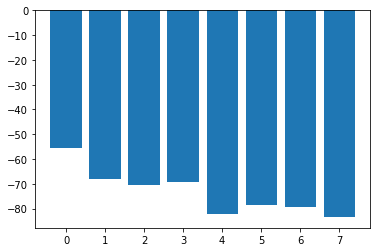

In [47]:
y1 = [
np.mean(dataSet['1m']),    
np.mean(dataSet['2m']),
np.mean(dataSet['3m']),
np.mean(dataSet['4m']),
np.mean(dataSet['7m']),
np.mean(dataSet['8m']),    
np.mean(dataSet['9m']),
np.mean(dataSet['10m'])]

plt.bar(range(8), y1)

(array([  7.,  17.,  59., 136., 255., 307.,   0.,   0.,   0.,   4.]),
 array([-101. ,  -90.9,  -80.8,  -70.7,  -60.6,  -50.5,  -40.4,  -30.3,
         -20.2,  -10.1,    0. ]),
 <a list of 10 Patch objects>)

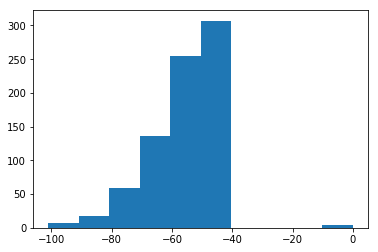

In [48]:
plt.hist(dataSet['1m'])

# 접근법
1. feature를 신호값, MIN, MAX, 평균, 값의 차이 ... 
2. 0과 1 이진분류니 애매한 데이터는 아예 쓰지 않는 것이 좋다.